In [1]:
import pandas as pd

home_data = pd.read_csv('data/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

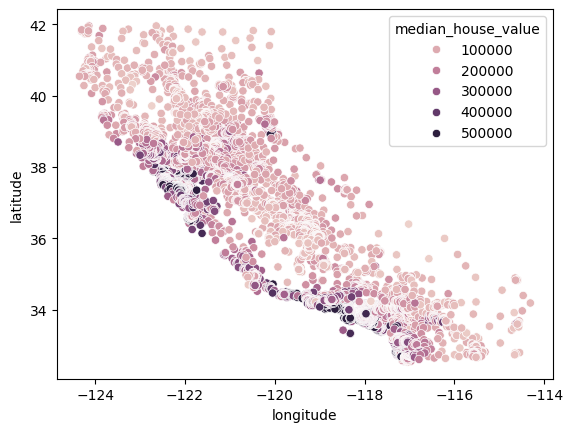

In [2]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')



In [22]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(home_data[['latitude', 'longitude']])
print(X_train_norm)

[[ 0.29601821 -0.9551823 ]
 [ 0.29589769 -0.95521964]
 [ 0.29578221 -0.9552554 ]
 ...
 [ 0.30932376 -0.95095679]
 [ 0.30909316 -0.95103176]
 [ 0.30885191 -0.95111014]]


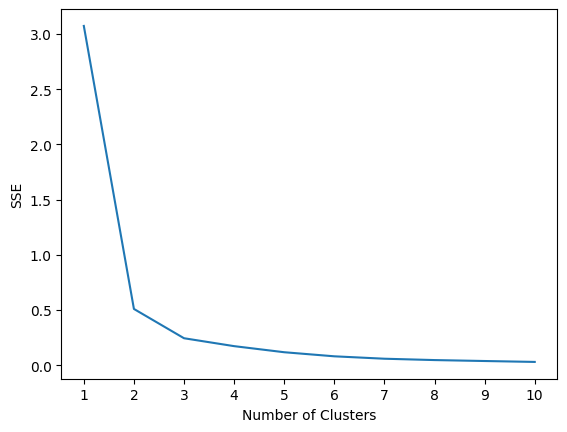

In [26]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt


#initialize kmeans parameters
kmeans_kwargs = {
    "n_init": 10,
    "random_state": 0,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X_train_norm)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [28]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, n_init=10, random_state=0)

<Axes: xlabel='longitude', ylabel='latitude'>

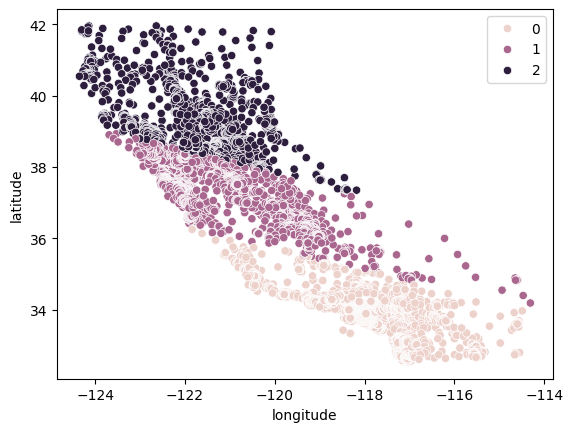

In [30]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = kmeans.labels_)


<Axes: ylabel='median_house_value'>

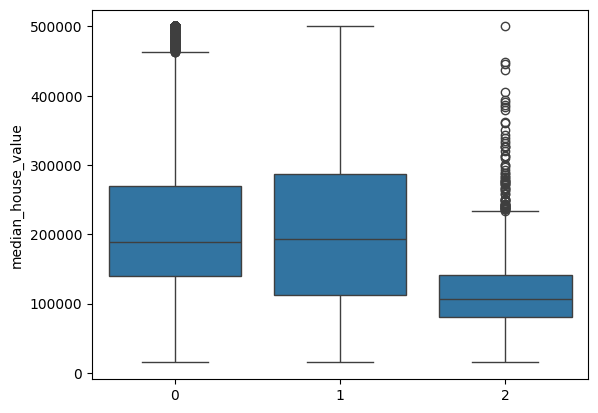

In [32]:
sns.boxplot(x = kmeans.labels_, y = home_data['median_house_value'])

In [35]:
home_data['cluster'] = kmeans.labels_

<Axes: xlabel='longitude', ylabel='latitude'>

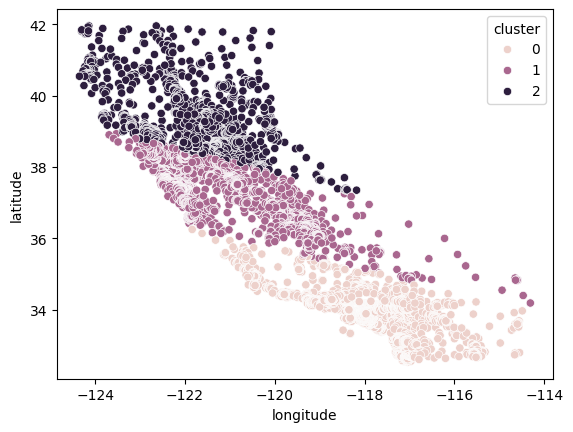

In [36]:
sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'cluster')


In [37]:
print(home_data.groupby('cluster')['median_house_value'].mean())

cluster
0    218522.278940
1    215536.394372
2    117824.748402
Name: median_house_value, dtype: float64
